<span style="color:red">Assignment Grade: 7.3</span>

  Q 1a: 7.0

  Q 1b: 2.0

  Q 1c: 9.0

  Q 2: 8.5

  Q 3: 10.0

  Global Deductions: 0.0

  Assignment grade is average of question grades minus global deductions. 

  Comments from pre-grade: Your homework is gradeable but not complete see errors: Missing two or more P3 least squares coefficients k==100000. Missing two or more P1(b) 3-periodic pts. Missing two or more P1(b) 2-periodic pts. Missing two or more P1(a) failure pts three iterations. Tue. Feb 27 at 00:01:39  

  TA comments: 


# Assignment 2 - Due Friday February 23rd, at 11:59pm

Your completed assignment should be saved in your Bitbucket mp248 repository in the file **Assignment.2/Assignment.2.ipynb**.   

**Do your work in a copy of this i-python notebook.**

**Ensure you label your code blocks** eg: (1)(a), (2)(b), (2)(b)continued, etc.

Please ensure you do not have a copy of the course repository inside your personal mp248 Bitbucket repository. This assignment uses many csv files (from the course repository).  **Do not include** these with your homework, and do not store them on your mp248 repository.  The issue here is that if you store large files in your mp248 repository it slows down the grading script substantially and makes it more difficult for us to give you timely feedback before the due date. In your code, just point to the location (outside of your personal repository) when you need them.


## Problem 1

Recall Newton's method for finding the roots of $z^3-1$.  The iterator is

$$N(z) = z-\frac{f(z)}{f'(z)} = z - \frac{z^3-1}{3z^2} = \frac{2z^2+1}{3z^2}$$

In this problem we ask you to use Sympy to find:

 (a) The points in the plane where Newton's method fails after 2 or 3 iterations. Notice that $N(z) = \frac{2z^2+1}{3z^2}$ which is well-defined as long as $z \neq 0$.  Thus Newton's method fails on one iteration only for $z=0$. Find both closed-form expressions for your answers as well as floating-point approximations. Print the approximations in your notebook. Use the Python casting technique **complex(z)** to convert the Sympy complex number **z** to a floating point approximation. In your notebook also count the number of points, i.e. write "The number of points where Newton's method fails after exactly two iterations is . . ."
 
 (b) The points in the plane where Newton's method is periodic of period 2 or 3.  A point is periodic of period 1 means $N(z) = z$.  Periodic of period 2 means $N(N(z))=z$ and $N(z) \neq z$.  Periodic of period 3 means $N(N(N(z))) = z$ while $N(z) \neq z$ and $N(N(z))\neq z$. 
 
 So for example, the points of period $1$ are the solution to the equation
 $$z = N(z) = z - \frac{z^3-1}{3z^2}$$
 which we can see are the roots of the original equation $z^3-1$. Similarly write-out the number of periodic points of period exactly 2, similarly for period 3.
 
 (c) Make a basins of attraction plot (feel free to use your code from the corresponding lab) for Newton's method for the polynomial $z^3-1$, using the colours red, green and blue.  Add to your plot the points where Newton's method eventually fails (part (a)) in 1, 2 or 3 iterations. Use yellow for these points.  Also add the periodic points of period 1, 2 and 3, using white for these points. Use a scatter plot so you can set the size of the points. Make points where Newton's method eventually fails smaller if it takes more iterations for them to fail, similarly make periodic points of larger period smaller in your plot. Ensure your image has a resolution of 800x800. Use **%matplotlib inline** to ensure your images save to your notebook. 


## Problem 1

In [4]:

import sympy as sp
import numpy as np


f = sp.Function('f')
z = sp.Symbol('z')
N = z - f(z)/f(z).diff(z) #Newton iterate


#first iteration of Newton's method
N_cube = sp.simplify(N.subs(f(z), z**3 - 1).doit())
sp.pprint(sp.Eq(sp.Symbol('N_1'), N_cube))

#now we take the second iteration
N_cube2 = sp.simplify(N.subs(f(z), N_cube).doit())
#print("\n", N_cube2)
sp.pprint(sp.Eq(sp.Symbol('N_2'), N_cube2))

#and the third:
#print("\n")
N_cube3 = sp.simplify(N.subs(f(z), N_cube2).doit())
sp.pprint(sp.Eq(sp.Symbol('N_3'), N_cube3))


        3    
     2⋅z  + 1
N₁ = ────────
          2  
       3⋅z   
      -3⋅z   
N₂ = ────────
        3    
     2⋅z  - 2
          4  
       3⋅z   
N₃ = ────────
        3    
     2⋅z  + 1


### 1 A

In [2]:
#1a)
#the discontinuities happen when f,g,h = 0. So, we solve them for their roots.

f = 3*z**2
g = -2*z**3+2
h = 2*z**3+1

disc_1 = sp.solve(f,z)
disc_2 = sp.solve(g,z)
disc_3 = sp.solve(h,z)


disc_2_float = [complex(i) for i in disc_2]
disc_3_float = [complex(i) for i in disc_3]

print("Newton's method fails after two iterations when N_1 is discontinuous (ie, z = 0), and at these points: \n")
sp.pprint(disc_2)
print("\nor, in floating point values: \n")
print(disc_2_float)

print("\nNewton's method fails after three iterations when N_2 is discontinuous, as listed above, and at these points: \n")
sp.pprint(disc_3)
print("\nor, in floating point values: \n")
print(disc_3_float)
#note that the roots of the equation are where N_2 is discontinuous. so:
roots = disc_2
roots_floats = disc_2_float


Newton's method fails after two iterations when N_1 is discontinuous (ie, z = 0), and at these points: 

⎡     1   √3⋅ⅈ    1   √3⋅ⅈ⎤
⎢1, - ─ - ────, - ─ + ────⎥
⎣     2    2      2    2  ⎦

or, in floating point values: 

[(1+0j), (-0.5-0.8660254037844386j), (-0.5+0.8660254037844386j)]

Newton's method fails after three iterations when N_2 is discontinuous, as listed above, and at these points: 

⎡  2/3    2/3    2/3        2/3    2/3     ⎤
⎢-2      2      2   ⋅√3⋅ⅈ  2      2   ⋅√3⋅ⅈ⎥
⎢──────, ──── - ─────────, ──── + ─────────⎥
⎣  2      4         4       4         4    ⎦

or, in floating point values: 

[(-0.7937005259840997+0j), (0.3968502629920499-0.6873648184993013j), (0.3968502629920499+0.6873648184993013j)]


## Marker Comments

* 6/6: Correct set-up.
* 1/2: Correct exact solutions only for second iteration failures.
* 1/2: Correct floating-point approximations only for second iteration failures.
* Major error, -1: Your answers for failure after two iterations are actually the points for failure after one iteration. Similarly, your answers for three steps are the answers for two steps.

The number of points where Newton's method fails after two iterations is 4. The number of points where Newton's method fails after three iterations is 7.

## Marker Comments

* 0/2: Wrong answers, and I don't see where you got them from. You found three values and three values, not four and seven.

### 1 B

In [16]:
#1b) the periodicity happens when f-z, g-z, h-z are equal to zero. so we solve for their roots
f =N_cube - z
g =N_cube2 -z
h =N_cube3 -z

#here we solve with solvesets so we can easily take the complement of two sets since the periodic points of one iteration do not include those of the previous.
p_1= sp.solveset(f,z)
p_g =sp.solveset(g,z)
p_h = sp.solveset(h,z)

p_2 = sp.Complement(p_g, p_1)
p_3 = sp.Complement(p_h, sp.Union(p_g, p_1))

#this will be useful later when we plot the points. 
p_2_list = list(p_2)
p_1_list = list(p_1)
p_1_float = [complex(i) for i in p_1_list]
p_2_float = [complex(i) for i in p_2_list]


print("The set of points where Newton's method is periodic of period 2 is:\n")
sp.pprint(p_2_list)
print("\nor, in floating point approximations: \n", p_2_float)
print("\nThe set of points where Newton's method is periodic of period 3 is the empty set:")
sp.pprint(p_3)








The set of points where Newton's method is periodic of period 2 is:

⎡     2/3    2/3    2/3        2/3    2/3     ⎤
⎢   -2      2      2   ⋅√3⋅ⅈ  2      2   ⋅√3⋅ⅈ⎥
⎢0, ──────, ──── - ─────────, ──── + ─────────⎥
⎣     2      4         4       4         4    ⎦

or, in floating point approximations: 
 [0j, (-0.7937005259840997+0j), (0.3968502629920499-0.6873648184993013j), (0.3968502629920499+0.6873648184993013j)]

The set of points where Newton's method is periodic of period 3 is the empty set:
∅


## Marker Comments

* 2/6: It's hard to follow your solution, but you have a few correct steps.
* 0/2: No correct solutions for period 2. Notice that your points all appeared in the previous part! If Newton's Method fails for these points, it can't be periodic.
* 0/2: No correct solutions for period 3.

### 1 C

In [31]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


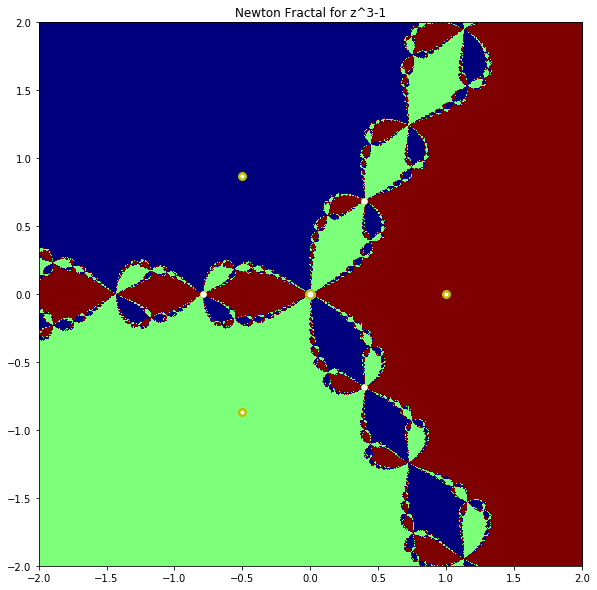

In [33]:
#1c)
f = lambda x: x**3 - 1
fprime = lambda x: 3*x**2

#finds the root that newton's method converges to for a given initial value. 
def newton_roots(z, f, fprime, sig_figs = 1e-6):
    while True:
        zi = f(z)/fprime(z)
        if abs(zi) < sig_figs:
            return z
        z -= zi        

        
#plots a basin of attraction fpr z^3-1 and the points of failure and the points of periodicity
def basinplot (f, fprime, xres = 1600, yres = 1600, extent=[-2,2,-2,2], cmap='jet'):
    root_count = 0
    roots = {}
    m = np.zeros((xres,yres))
    xmin, xmax, ymin, ymax = extent
    for r, x in enumerate(np.linspace(xmin, xmax, xres)):
        for s, y in enumerate(np.linspace(ymin, ymax, yres)):
            z = x + y*1j
            root = np.round(newton_roots(z, f, fprime), 1)
            if not root in roots:
                roots[root] = root_count
                root_count += 1
                
            m[r, s] = roots[root]
    plt.imshow(m.T, cmap=cmap, extent=extent)
    plt.title("Newton Fractal for z^3-1")
    plt.plot(0,0, 'yo', markersize = 10)
    
    
    plt.plot([i.real for i in disc_2_float], [i.imag for i in disc_2_float], 'yo', markersize=8)
    plt.plot([i.real for i in disc_3_float], [i.imag for i in disc_3_float], 'yo', markersize=6)
    
    plt.plot([i.real for i in p_2_float], [i.imag for i in p_2_float], 'wo', markersize=5)
    plt.plot([i.real for i in p_1_float], [i.imag for i in p_1_float], 'wo', markersize=3)
 
    plt.figure(figsize(10,10))
  
   
   
basinplot(f, fprime)







## Marker Comments

* 4/4: Correct basins.
* 2/3: Incorrect periodic points. Looks like all failure points are yellow as well.
* 2/3: Correct failure points. Looks like all periodic points are white as well.
* Bonus point, +1: Image is 800x800.

## Problem 2

In this problem we ask to you extend the code from **Part.II/Data.1.filled.ipynb**. As in class, load and parse the files in the **w.sask** and **w.vic** subdirectories to create the variable **mList**.  For this problem use the data from **mList**.

(a) Make a plot of daily precipitation, comparing two cities.  Make the plot for Saskatoon vs. Victoria.  On the x-axis you will have the daily precipitation for Victoria.  On the y-axis you will have the daily precipitation for Saskatoon.  Only plot dates where (in mList) we have precipitation data for both cities.  In particular, once you have combed through the data to find the precipitation data for the common dates, print a line in your python notebook of the form "Common data: n" where n is the number of days where we have precipitation data for both Victoria and Saskatoon.  

(b) Make a similar daily plot of mean temperatures of Victoria vs. Saskatoon.  Include the linear least squares interpolation in your plot. 

In [53]:
#setup for the problem, taken from class notes. 

#********IMPORTANT***********
# when this code was written, w.sask and w.vic were in the current directory but for the sake of the grading script they were removed.
# if the code is recomplied it will not run
#********IMPORTANT***********

## Let's start by loading all the weather data, storing it in a list of dictionaries. An element of 
## this list will consist of the weather file headers, turned into a dict-object.  

## There will also be an additional weather-table key that will contain a list of dict objects. 
## containing the data the from a line of the file. 

import datetime as dt
import os as os
import fnmatch as fn
from operator import itemgetter

wsubdir = fn.filter(os.listdir('.'), "w.*")
print("Weather subdirectories:", wsubdir)

## each file is of the form "key", "data" for several lines, then a blank space
## "Legend" then several (ignorable) lines, then a blank space
## "keys" separated by commas then
## remaining lines are the key values for each measurement. 

masterList = [] ## list of weather station dict objects

for wd in wsubdir:
    files = fn.filter(os.listdir(wd), "eng-daily*.csv")
    for wdf in files:
        with open('./'+wd+'/'+wdf, encoding="UTF-8") as f:
            blanks=0
            content = f.readlines()
            FD = dict() ## file dict head.
            FL = [] ## file list.
            keys = []
            for LN in content:
                PL = LN.replace(u'\ufeff','').split(",")
                for i in range(len(PL)): # this removes the quotes around the numbers.
                    PL[i] = PL[i].translate({ord(c): None for c in '"\n'})
                if len(PL)==1 and PL[0]=='':
                    blanks+=1
                    if blanks==2 and PL[0]=='':
                        continue
                ## if blanks==0 we need to build the main dict
                ## if blanks==1 we ignore
                ## if blanks==2 we build the data.
                if blanks==0:
                    FD[PL[0]] = PL[1]
                    if PL[0]=="Station Name":
                        FD["Data"] = []
                if blanks==2:
                    if PL[0]=="Date/Time":
                        keys = PL
                    else:
                        FD["Data"].append( { keys[i] : PL[i] for i in range(len(keys)) } )
            masterList.append(FD)        

## make set of "Station Name"s. 
## use it to merge common station names into one (more useful) masterList.
sNames = { x['Station Name'] for x in masterList}
print("Station names:", sNames)

## return index of list of dict if dict keyed-element exists, -1 otherwise
def indIfExists(LOD, keyname, value):
    for i in range(len(LOD)):
        if LOD[i][keyname] == value:
            return i
    return -1

## run through masterlist, if that airport exists in mList we merge, if not, we copy it over.
mList = []
while len(masterList)>0:
    I = indIfExists(mList, 'Station Name', masterList[-1]['Station Name'])
    if I<0:
        mList.append(masterList.pop())
    else:
        mList[I]["Data"].extend(masterList.pop()["Data"])

## run through the weather station data, replace the date record with a datetime object
for WS in mList:
    badItems = set()
    for i in range(len(WS["Data"])):
        ## Let's convert the dict from strings to appropriate datetime and float objects
        ## dates with bad data we will flag and remove.
        for key, value in WS["Data"][i].items():
            if key=="Date/Time":
                WS["Data"][i][key] = dt.datetime.strptime(value, "%Y-%m-%d")
            elif key in [ 'Min Temp (°C)', 'Total Precip (mm)',  \
                          'Max Temp (°C)', 'Mean Temp (°C)']:
                try:
                    WS["Data"][i][key] = float(value)
                except:
                    badItems.add( i )
    #print(len(WS["Data"]), end=" ")
    WS["Data"] = [WS["Data"][i] for i in range(len(WS["Data"])) if i not in badItems]
    #print(len(WS["Data"]), "\n")
    WS["Data"] = sorted(WS["Data"], key=itemgetter("Date/Time"))




    

Weather subdirectories: ['w.vic', 'w.sask']
Station names: {"SASKATOON DIEFENBAKER INT'L A", 'VICTORIA INTL A', "VICTORIA INT'L A", 'SASKATOON SRC'}


In [36]:
#setup for the question - defining function we will use

victoria_data = mList[2]['Data'] + mList[3]['Data']
saskatoon_data = mList[0]['Data'] + mList[1]['Data']

#inputs a list station_data and outputs a list of days on which there are records. 
def days_recorded(station_data):
    date = [(i['Year'], i['Month'], i['Day']) for i in station_data]
    return date
 
#inputs a list of days, a list of station data and a key name. 
#outputs a list of the values stored under the key for the station in question
def get_vals(dates, station_data, header):
    total_vals= []
    for i in station_data:
         if (i['Year'], i['Month'], i['Day']) in dates:
                total_vals.append(i[header])       
    return total_vals


### 2A

In [46]:
#2a
#creating a list of days where vic has data, and then for where sask has data, and then taking their intersection

victoria_dates = days_recorded(victoria_data)
saskatoon_dates = days_recorded(saskatoon_data)
#note we do not use the intersection method even though it is much quicker since we want to keep our data ordered, and intersect seems to scramble it
same_days = [x for x in victoria_dates if x in saskatoon_dates]


## Marker Comment

Why do you care if your data gets scrambled?

In [47]:
#2a
#creating lists to be plotted of the precipitation values for vic and sask

vic_precip = get_vals(same_days, victoria_data, 'Total Precip (mm)')
sask_precip = get_vals(same_days, saskatoon_data, 'Total Precip (mm)')


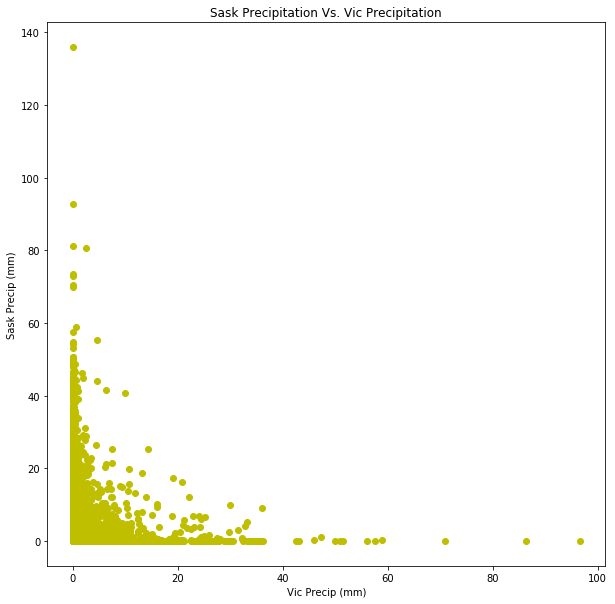

In [48]:
#2a
#plotting the precip lists:

figure_1 =plt.plot(sask_precip,vic_precip ,'yo')
plt.ylabel("Sask Precip (mm)")
plt.xlabel("Vic Precip (mm)")
plt.title("Sask Precipitation Vs. Vic Precipitation")
xw = max(vic_precip)-min(vic_precip)
yw = max(sask_precip)-min(sask_precip)
scl = max([xw, yw])
plt.figure(figsize=(10*xw/scl,10*yw/scl))


## Marker Comments

* 4/4: Correct algorithm to find common dates.
* 2/3: Good precipitation plot, but axis labels are reversed.
* Small error, -0.5: Number of common dates not printed.

### 2B

In [41]:
#2b
#obtaining lists of mean temp values for vic and sask to be plotted
sask_mean_temp = get_vals(same_days, saskatoon_data, 'Mean Temp (°C)')
vic_mean_temp = get_vals(same_days, victoria_data, 'Mean Temp (°C)')

[[-19.50239038]
 [  2.2183622 ]]


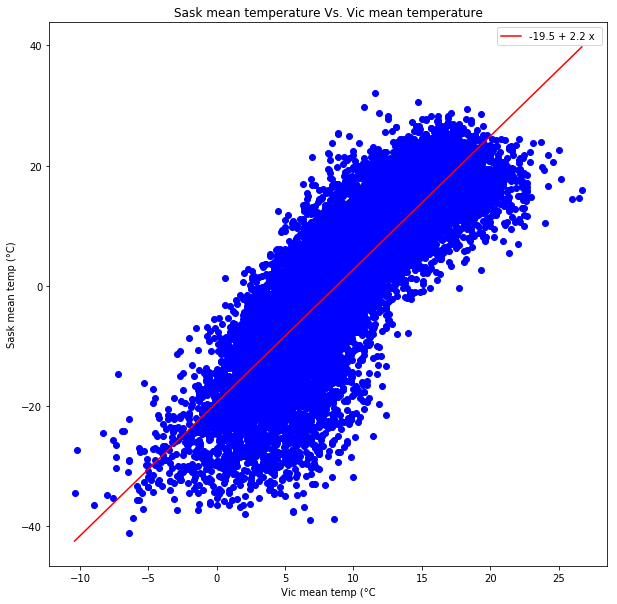

In [42]:
#2b
#plotting, and fitting a least squares linear fit to the plot.
plt.plot(vic_mean_temp, sask_mean_temp, 'bo')

A = np.matrix([[1.0, x] for x in vic_mean_temp]).T
y = np.matrix([y for y in sask_mean_temp]).T
c = np.matmul(np.matmul(np.linalg.inv(np.matmul(A,A.T)), A), y) 
c0 = c[0,0]
c1 = c[1,0]
print(c)
plt.plot([min(vic_mean_temp), max(vic_mean_temp)], [c0+c1*min(vic_mean_temp)+c2*min(vic_mean_temp)**2, c0+c1*max(vic_mean_temp)], color="red", label=str("%1.1f + %1.1f x " % (c0,c1)))

plt.legend()
plt.ylabel("Sask mean temp (°C)")
plt.xlabel("Vic mean temp (°C")
plt.title("Sask mean temperature Vs. Vic mean temperature")
xw = max(vic_mean_temp)-min(vic_mean_temp)
yw = max(sask_mean_temp)-min(sask_mean_temp)
scl = max([xw, yw])
plt.figure(figsize=(10*xw/scl,10*yw/scl))



## Marker Comments

* 3/3: Correct temperature plot.
    
Excellent use of legend!

## Problem 3

In this problem we ask you to extend your code from the second quiz. Recall the function

$$ f(n) = \left\{ \matrix{n/2 & if \ n \ even \cr 3n+1 & if \ n \ odd} \right.$$

In the quiz, we asked you to apply $f$ repeatedly to integer inputs and keep track of how many iterations it took until you found the integer $1$. 

Write some code that computes a list, $L$, where the $k$-th element of the list is the number of times it takes to turn $k+1$ into $1$ by applying the function $f$.  

Now consider the function $T(k) = L[0] + L[1] + \cdots + L[k-1]$.   Make a plot of $T(k)$ for $k=1,2,3, \cdots, 10000$.  Do a least squares interpolation on this plot, for a linear and quadratic fitting.   Try it again on the plot for $k=1,2,3, \cdots, 100000$.  Does it look like the least squares fittings are converging?  

In [49]:
## Problem 3

#iterates the collatz function on n
def f(n):
    if n%2 == 0:
        return int(n/2)
    else:
        return int(3*n+1)

#prints all the collatz iterations for a number n
n = 3
string = ""
while n != 1:
    if n == 1:
        break
    else:
        string += str(f(n)) + " "
    n = f(n)
print (string)

#determines how many iterations of the collatz funciton required to get to 1
def collatz_len(n):
    length = 0
    while n != 1:
        if n == 1:
            break
        else:
            length += 1
        n = f(n)
    return (length)







    

    

10 5 16 8 4 2 1 


In [50]:
#here we create a list containing all T(k) values mapped to by each k value
def create_T_list(k):
    i = 0
    Tk = 0 
    T_vals = []
    k_vals = arange(1,k+1,1)
    k_length = [collatz_len(i) for i in k_vals]
    
    while i != k:
        Tk += k_length[i]
        T_vals.append(Tk)
        i += 1 
    return [k_vals, T_vals]



[[-36250.35579544]
 [    86.69153221]]
[[ -1.40366275e+04]
 [  7.33659603e+01]
 [  1.33242395e-03]]


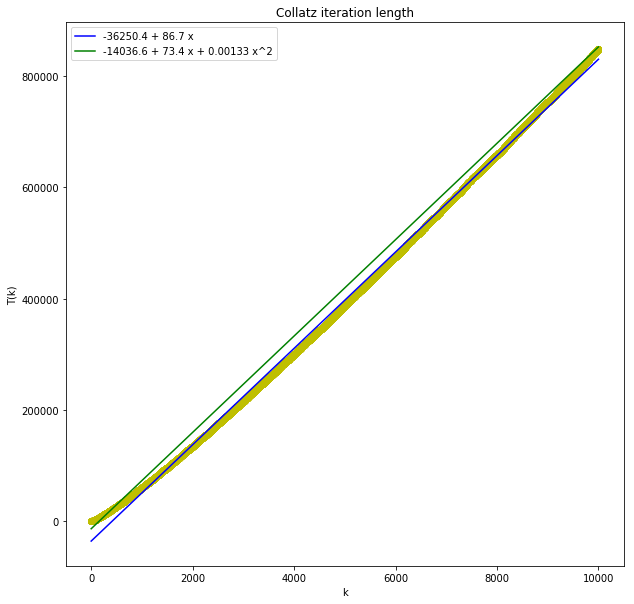

In [51]:
T_10000= create_T_list(10000)
xp = T_10000[0]
yp = T_10000[1]


plt.figure(figsize=(10,10))
plt.xlabel('k')
plt.ylabel('T(k)')
plt.title("Collatz iteration length")
figure_2 = plt.plot(xp, yp, 'yo')

import numpy as np


A = np.matrix([[1.0, x] for x in xp]).T
y = np.matrix([y for y in yp]).T


c = np.matmul(np.matmul(np.linalg.inv(np.matmul(A,A.T)), A), y) 
print(c)
## c_0 = 8.06, c_1 = 1.13
c0=c[0,0]
c1=c[1,0]


#making parameters for the plot

plt.plot([min(xp), max(xp)], [c0+c1*min(xp), c0+c1*max(xp)], color="blue", label=str("%1.1f + %1.1f x" % (c0,c1)))

A = np.matrix([[1.0, x, x*x] for x in xp]).T
y = np.matrix([y for y in yp]).T
c = np.matmul(np.matmul(np.linalg.inv(np.matmul(A,A.T)), A), y) 

c0 = c[0,0]
c1 = c[1,0]
c2 = c[2,0]

plt.plot([min(xp), max(xp)], [c0+c1*min(xp)+c2*min(xp)**2, c0+c1*max(xp)+c2*max(xp)**2], color="green", label=str("%1.1f + %1.1f x + %1.5f x^2" % (c0,c1,c2)))
plt.legend()

print(c)




[[ -3.32421894e+05]
 [  1.09122835e+02]]
[[ -1.19954631e+05]
 [  9.63750544e+01]
 [  1.27476534e-04]]


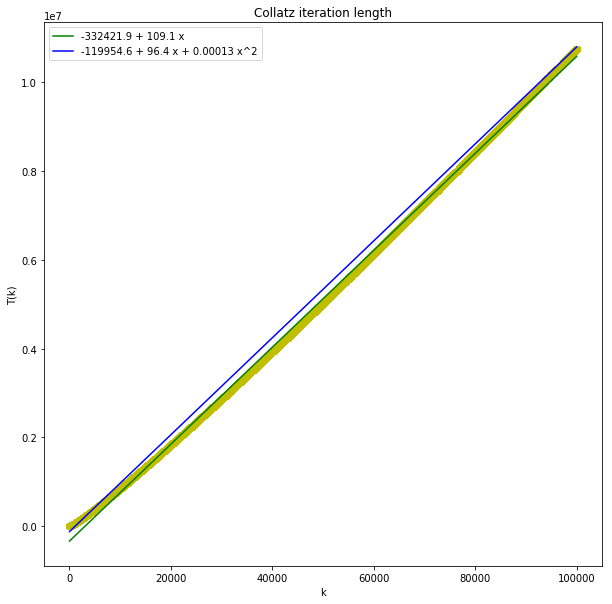

In [52]:
T_100000= create_T_list(100000)
xp = T_100000[0]
yp = T_100000[1]

plt.figure(figsize=(10,10))
plt.xlabel('k')
plt.ylabel('T(k)')
plt.title("Collatz iteration length")
figure_2 = plt.plot(xp, yp, 'yo')


import numpy as np


A = np.matrix([[1.0, x] for x in xp]).T
y = np.matrix([y for y in yp]).T

c = np.matmul(np.matmul(np.linalg.inv(np.matmul(A,A.T)), A), y) 

print(c)
## c_0 = 8.06, c_1 = 1.13
c0=c[0,0]
c1=c[1,0]

plt.plot([min(xp), max(xp)], [c0+c1*min(xp), c0+c1*max(xp)], color="green", label=str("%1.1f + %1.1f x" % (c0,c1)))



A = np.matrix([[1.0, x, x*x] for x in xp]).T
y = np.matrix([y for y in yp]).T
c = np.matmul(np.matmul(np.linalg.inv(np.matmul(A,A.T)), A), y) 

c0 = c[0,0]
c1 = c[1,0]
c2 = c[2,0]

plt.plot([min(xp), max(xp)], [c0+c1*min(xp)+c2*min(xp)**2, c0+c1*max(xp)+c2*max(xp)**2], color="blue", label=str("%1.1f + %1.1f x + %1.5f x^2" % (c0,c1,c2)))
plt.legend()

print(c)




It appears that the least squares fits are not converging - in fact, the first coefficient for $T(100000)$ is an order of magnitude larger than that for $T(10000)$


## Marker Comments

* 4/4: Correct least squares fits.
* 2/2: Correct k=10,000 plot.
* 2/2: Correct k=100,000 plot.
* 2/2: Correct reasoning for convergence.